<a href="https://colab.research.google.com/github/jorgefpont/Coursera-ML-class/blob/master/MNIST_Ex2Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: The hello world of image classification
Dataset called MNIST which has items of handwriting -- the digits 0 through 9.

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The MNIST database contains 60,000 training images and 10,000 testing images. Images are 28x28 pixels.

https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png


In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# these are numpy arrays
for item in (x_train, y_train, x_test, y_test):
  print("size is: ", item.shape)

11493376/11490434 [==============================] - 0s 0us/step
size is:  (60000, 28, 28)
size is:  (60000,)
size is:  (10000, 28, 28)
size is:  (10000,)


label:   3
<class 'numpy.ndarray'>
(28, 28)


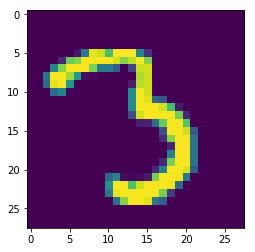

In [0]:
import matplotlib.pyplot as plt
some_img = 43456
plt.imshow(x_train[some_img])
print("label:  ", y_train[some_img])
print(type(x_train[some_img]))
print(x_train[some_img].shape)

In [0]:
# rescale 0-255 to 0-1
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:

callbacks = myCallback()

model = tf.keras.models.Sequential(
                                    [tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, callbacks=[callbacks])

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)
print()



Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2015 - acc: 0.9407
Epoch 2/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0814 - acc: 0.9750
Epoch 3/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0536 - acc: 0.9832
Epoch 4/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0374 - acc: 0.9879
Epoch 5/100
59520/60000 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9910
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0276 - acc: 0.9910

# Evaluate on test data
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0690 - acc: 0.9792
test loss, test acc: [0.06901291714381659, 0.9792]



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


(28, 28)
(1, 28, 28)
(1, 28, 28)
<class 'numpy.ndarray'>
Prediction vector = 
 [[5.1651561e-10 2.0388172e-10 2.9912639e-09 7.1631878e-04 1.5478822e-10
  9.9897754e-01 1.5184682e-09 5.1182711e-09 3.6918216e-06 3.0250539e-04]] 

Prediction =  5


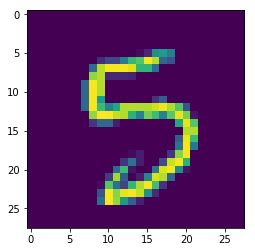

In [0]:
import numpy as np

some_img=2569 # enter number of one of the images (0 - 9999)

plt.imshow(x_test[some_img])
print(x_test[some_img].shape)

pred_some_img = np.expand_dims(x_test[some_img], axis=0)
print(pred_some_img.shape)
pred_some_img = np.vstack([pred_some_img])
print(pred_some_img.shape)
print(type(pred_some_img))

prediction = model.predict(pred_some_img)

print("Prediction vector = \n", prediction, '\n')
print("Prediction = ", np.argmax(prediction))


Saving num7.jpg to num7 (1).jpg
(1, 28, 28)
Prediction vector = 
 [[1.3906434e-10 1.5687315e-06 1.6959944e-04 1.6644359e-05 5.6425246e-12
  9.2344377e-10 3.2625940e-11 9.9981183e-01 6.5520013e-08 3.4163600e-07]] 

Prediction =  7


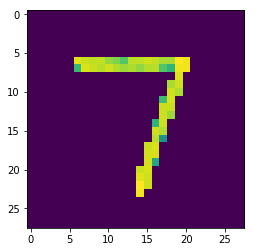

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.preprocessing.image import load_img

uploaded = files.upload()

# load the image
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = load_img(path, color_mode = "grayscale", target_size=(28, 28))
  
  # reverse the image from white to black background
  # and from black to white handwritting
  # 0 = black, 255 = white
  nRows, nCols = img.size
  transform = np.ones((nRows, nCols))*255.
  rImg = abs(img - transform)
  # darken the blacks, repl values less than 125 w 0
  np.place(rImg, rImg<125., 0)
  
  plt.imshow(rImg)
  
  rImg = np.expand_dims(rImg, axis=0) / 255.0
  rImg = np.vstack([rImg])
  print(rImg.shape)
  
  prediction = model.predict(rImg)
 
  print("Prediction vector = \n", prediction, '\n')
  # print(type(prediction))
  print("Prediction = ", np.argmax(prediction))

  
  